## Defining a class of Image Clusterer.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA
from matplotlib.colors import rgb_to_hsv
from PIL import Image
from ImageCluster import ImageClusterer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading the image and plotting it.

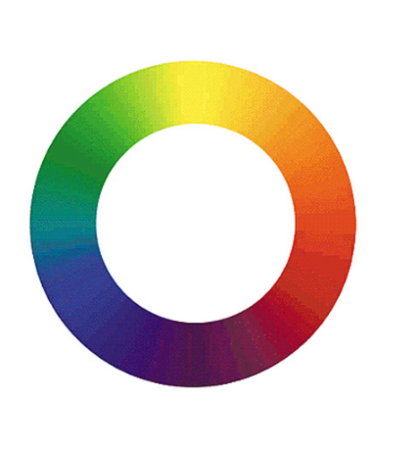

In [21]:
image = np.array(Image.open('rainbow.png'))
clusterer = ImageClusterer(image, color_mode="hsv")
clusterer.plot_image_rgb(figsize=(8, 8))

## Experiments with clustering of rainbow image.

### Image clustering using rgb features of image.

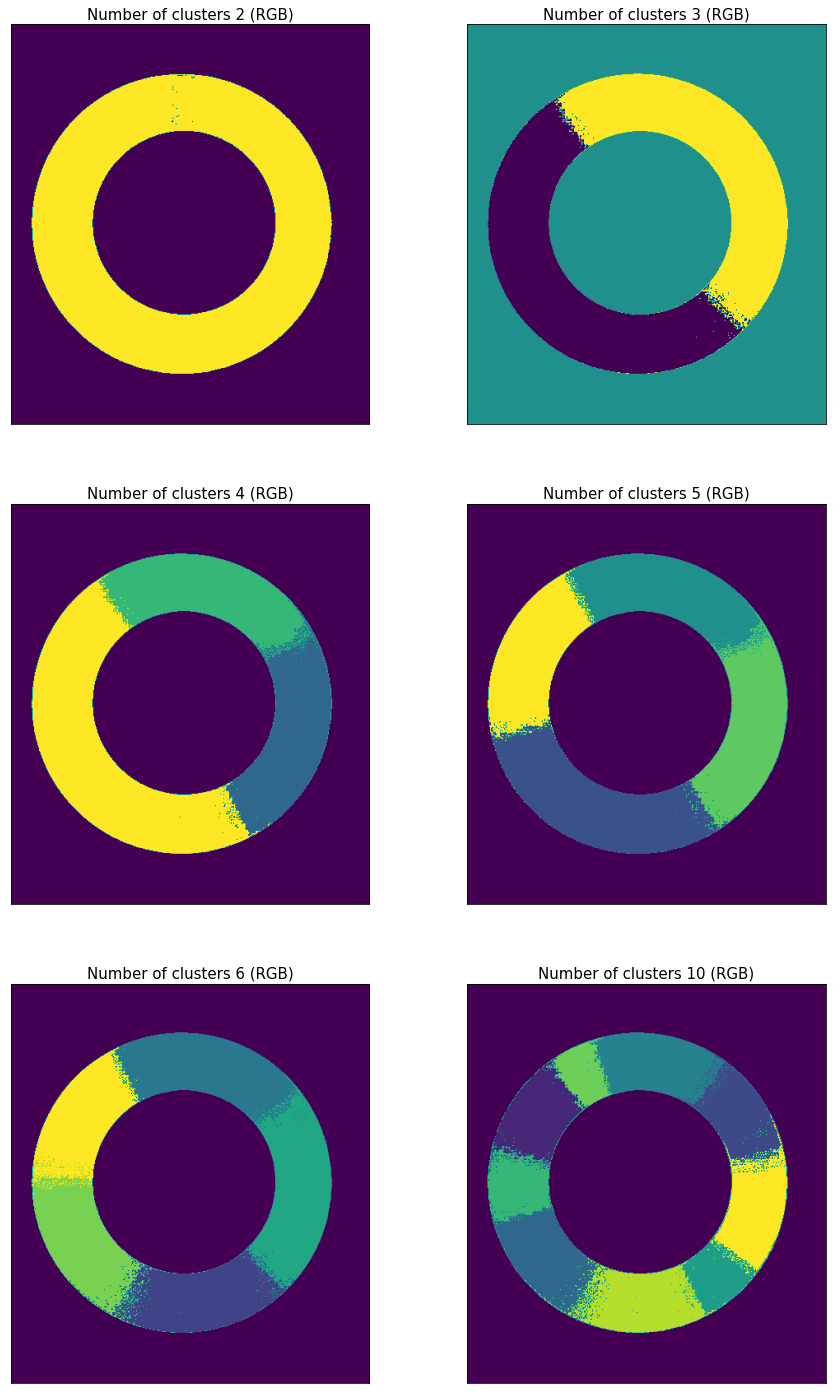

In [22]:
clusterer = ImageClusterer(image)
n_clusters = [2, 3, 4, 5, 6, 10]
figure, axes = plt.subplots(3, 2, figsize = (15, 25))
for n_clust, ax in zip(n_clusters, axes.flat):
    ax.set_title(f"Number of clusters {n_clust} (RGB)", fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(clusterer.predict(n_clust));

### Image clustering using rgb features of image reduced by PCA (2 components).

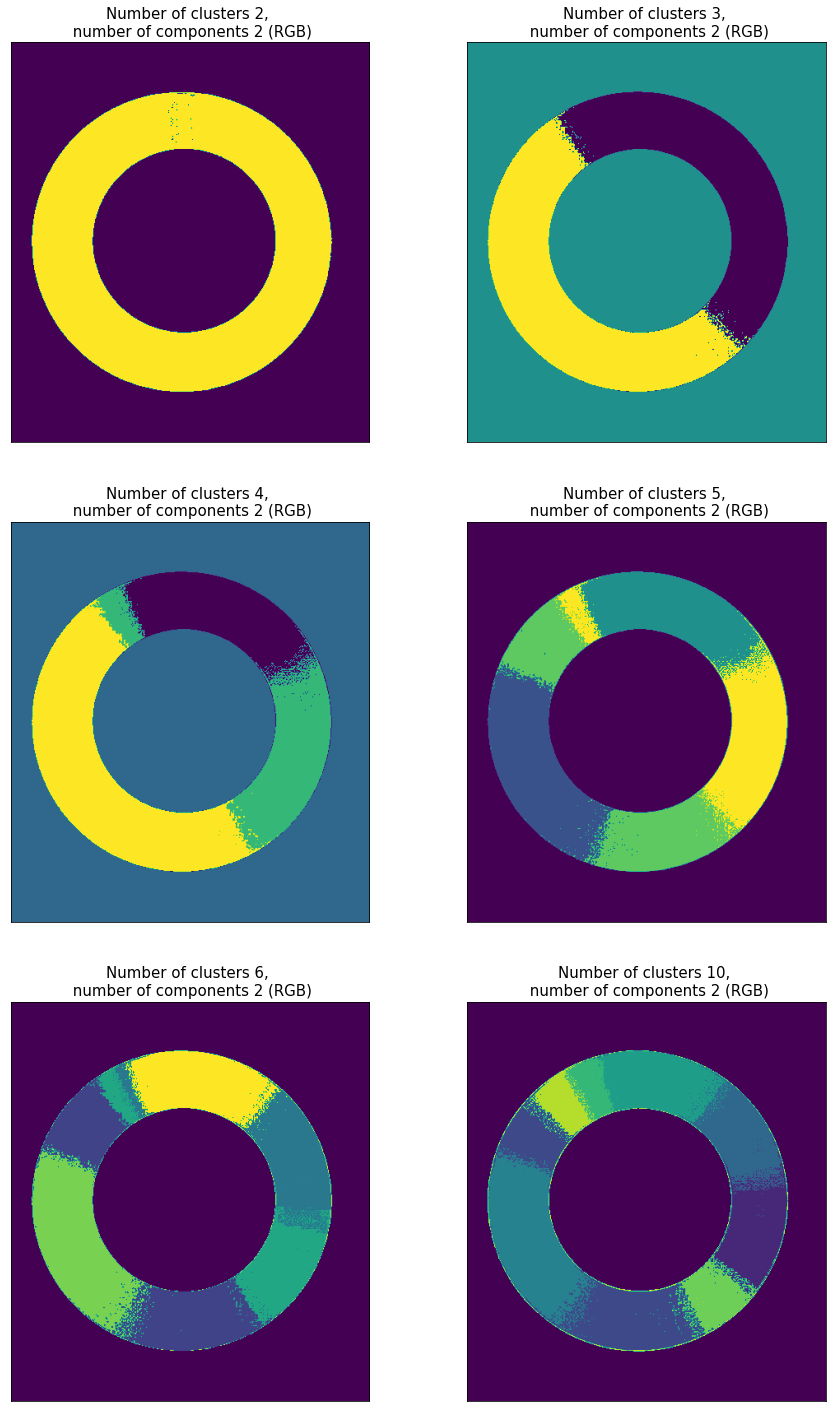

In [23]:
clusterer = ImageClusterer(image, number_of_components=2)
n_clusters = [2, 3, 4, 5, 6, 10]
figure, axes = plt.subplots(3, 2, figsize = (15, 25))
for n_clust, ax in zip(n_clusters, axes.flat):
    ax.set_title(f"Number of clusters {n_clust}, \n number of components 2 (RGB)", fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(clusterer.predict(n_clust));

In [ ]:
clusterer = ImageClusterer(image, number_of_components=2)
n_clusters = [2, 3, 4, 5, 6, 10]
figure, axes = plt.subplots(3, 2, figsize = (15, 25))
for n_clust, ax in zip(n_clusters, axes.flat):
    ax.set_title(f"Number of clusters {n_clust}, \n number of components 2 (RGB)", fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(clusterer.predict(n_clust));

### Image clustering using hsv features of image.

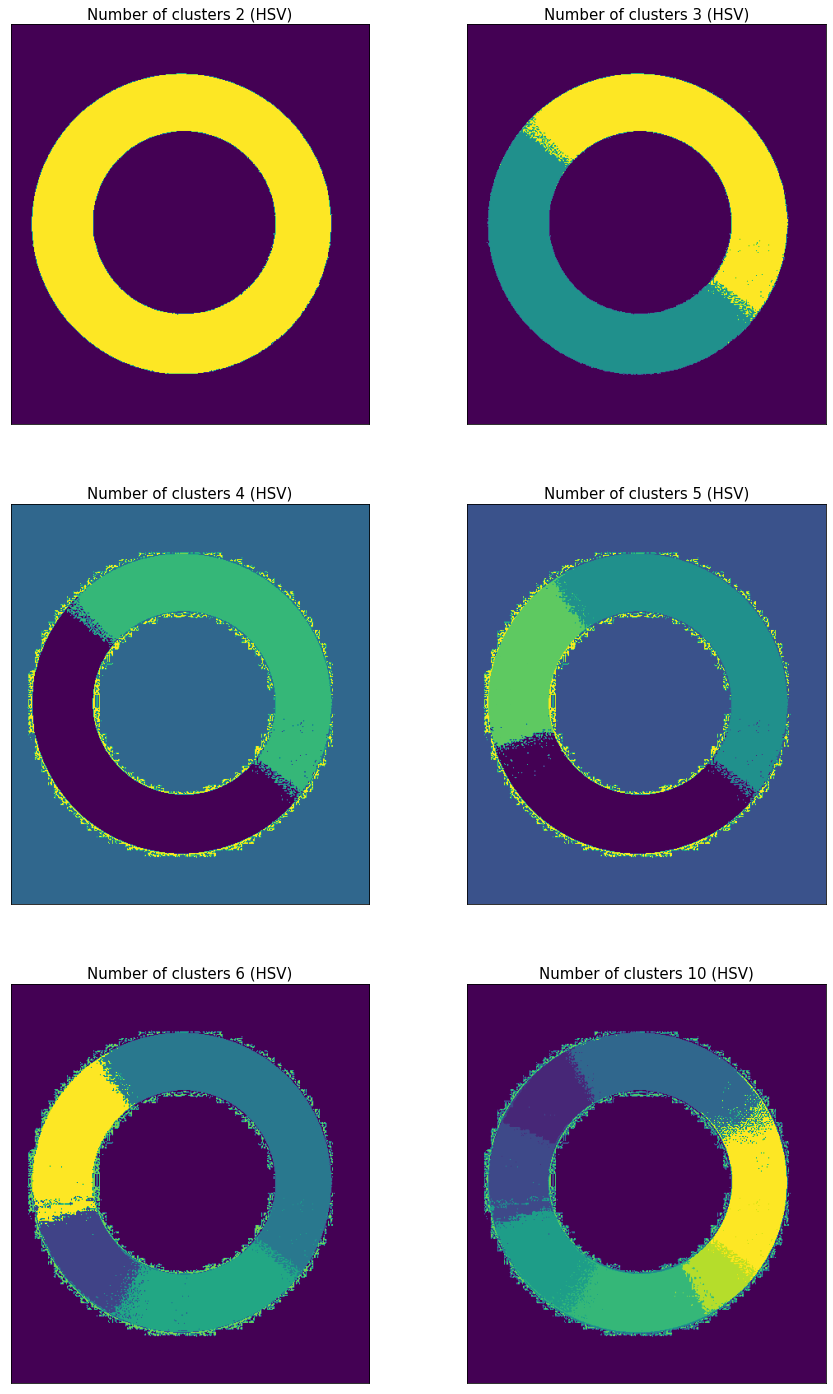

In [24]:
clusterer = ImageClusterer(image, color_mode="hsv")
n_clusters = [2, 3, 4, 5, 6, 10]
figure, axes = plt.subplots(3, 2, figsize = (15, 25))
for n_clust, ax in zip(n_clusters, axes.flat):
    ax.set_title(f"Number of clusters {n_clust} (HSV)", fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(clusterer.predict(n_clust));

### Image clustering using hue and saturation features of image.

The idea is that the given image is slice of HSV cylinder, so we have fixed V value.

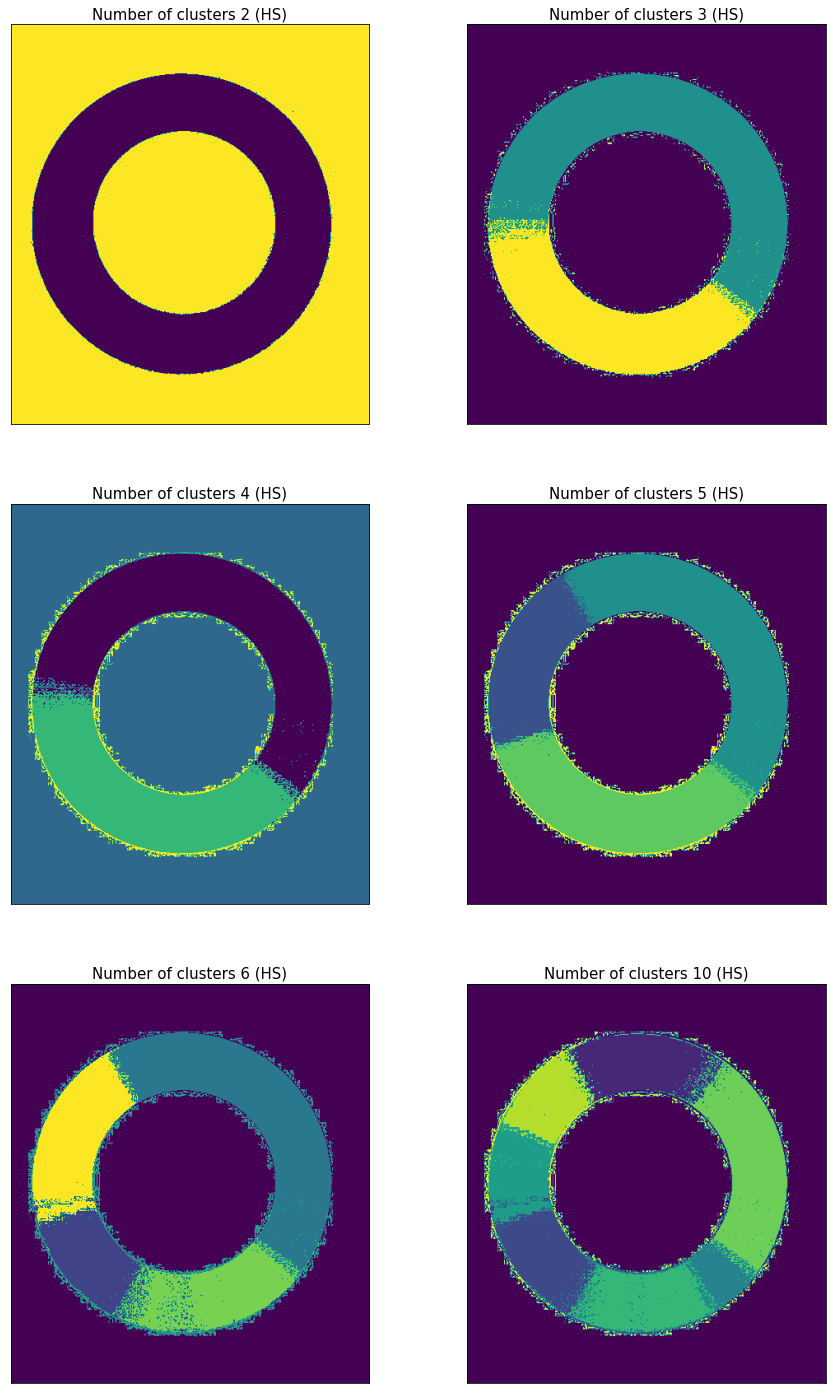

In [25]:
clusterer = ImageClusterer(image, color_mode="hsv", use_only_hs=True)
n_clusters = [2, 3, 4, 5, 6, 10]
figure, axes = plt.subplots(3, 2, figsize = (15, 25))
for n_clust, ax in zip(n_clusters, axes.flat):
    ax.set_title(f"Number of clusters {n_clust} (HS)", fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(clusterer.predict(n_clust));

## Conclusion

I made some experiments with clustering the rainbow image using k-mean algorithm and different image features. Using RGB features allows me to make good clustering. Additionaly I checked how the clusters will be changed if I make PCA onto 2 components. As a result, quality of clustering became worse. Also, I experimented with other color features of the given image (HSV). I checked that this image can be considered as slice of HSV-cylinder by V value. So, using HSV and HS features shows the same result of clustering. Contrary to using RGB, methods that used HSV features make new cluster which consist of pixels near the contour of the color ring (I think it is because of this pixels are the noise of the original image.)